<a href="https://colab.research.google.com/github/andrew-voortman/ML_Loan_Prediction_Model/blob/main/Test_Loan_Prediction_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline


In [2]:
# For creating models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
from google.colab import drive
drive.mount('/content/drive')
#train_df = pd.read_csv('/content/drive/My Drive/project4/Resources/train_u6lujuX_CVtuZ9i.csv')
#test_df = pd.read_csv('/content/drive/My Drive/project4/Resources/test_Y3wMUE5_7gLdaTN.csv')
preprocessing_df = pd.read_csv('/content/drive/My Drive/project4/Resources/preprocessed_train_data2.csv')
preprocessing_df.head(10)

Mounted at /content/drive


,Gender,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,0,5849.0,121.0,360.0,1.0,Y,0,0,1
1,0,1,1,1,0,6091.0,128.0,360.0,1.0,N,1,0,0
2,0,1,0,1,1,3000.0,66.0,360.0,1.0,Y,0,0,1
3,0,1,0,0,0,4941.0,120.0,360.0,1.0,Y,0,0,1
4,0,0,0,1,0,6000.0,141.0,360.0,1.0,Y,0,0,1
5,0,1,2,1,1,9613.0,267.0,360.0,1.0,Y,0,0,1
6,0,1,0,0,0,3849.0,95.0,360.0,1.0,Y,0,0,1
7,0,1,3,1,0,5540.0,158.0,360.0,0.0,N,0,1,0
8,0,1,2,1,0,5532.0,168.0,360.0,1.0,Y,0,0,1
9,0,1,1,1,0,23809.0,349.0,360.0,1.0,N,0,1,0


In [4]:
# Encode target variable
def loan_status(loan):
    if loan == "Y":
        return 1
    else:
        return 0

# Call the encode_edu function on the Education column
preprocessing_df["Loan_Status"] = preprocessing_df["Loan_Status"].apply(loan_status)

# Review the DataFrame
preprocessing_df.head()

,Gender,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,0,1,0,5849.0,121.0,360.0,1.0,1,0,0,1
1,0,1,1,1,0,6091.0,128.0,360.0,1.0,0,1,0,0
2,0,1,0,1,1,3000.0,66.0,360.0,1.0,1,0,0,1
3,0,1,0,0,0,4941.0,120.0,360.0,1.0,1,0,0,1
4,0,0,0,1,0,6000.0,141.0,360.0,1.0,1,0,0,1


In [5]:
# MODIFICATION
# Drop Gender Column
preprocessing_df.drop('Gender', axis=1, inplace=True)
preprocessing_df.head()

,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,0,0,1
1,1,1,1,0,6091.0,128.0,360.0,1.0,0,1,0,0
2,1,0,1,1,3000.0,66.0,360.0,1.0,1,0,0,1
3,1,0,0,0,4941.0,120.0,360.0,1.0,1,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,0,0,1


In [6]:
# Split our preprocessed data into our features and target arrays
X = preprocessing_df.drop("Loan_Status", axis=1)
y = preprocessing_df["Loan_Status"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [69]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [97]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=100
hidden_nodes_layer2=5
hidden_nodes_layer3=1

nn = tf.keras.models.Sequential()



In [98]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 100)               1200      
                                                                 
 dense_71 (Dense)            (None, 5)                 505       
                                                                 
 dense_72 (Dense)            (None, 1)                 6         
                                                                 
 dense_73 (Dense)            (None, 1)                 2         
                                                                 
Total params: 1713 (6.69 KB)
Trainable params: 1713 (6.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [99]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [100]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.6468 - accuracy: 0.6875
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5930 - accuracy: 0.6853
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5564 - accuracy: 0.6853
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.6853
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.6853
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5115 - accuracy: 0.6853
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5059 - accuracy: 0.6853
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.6853
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.4986 - accuracy: 0.7388
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.8192
Epoch 11/

In [101]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 0.5734 - accuracy: 0.7533 - 160ms/epoch - 32ms/step
Loss: 0.5733734369277954, Accuracy: 0.753333330154419


In [13]:
# Export our model to HDF5 file
nn.save('/content/drive/MyDrive/project4/Output/ModelTest.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
# Creating Logistic Regression Model
lr_model = LogisticRegression()

In [15]:
# Train the model
lr_model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred = lr_model.predict(X_test)


In [17]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.33      0.45        46
           1       0.76      0.95      0.85       104

    accuracy                           0.76       150
   macro avg       0.76      0.64      0.65       150
weighted avg       0.76      0.76      0.73       150



In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [19]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train)

In [20]:
predictions = rf_model.predict(X_test_scaled)

In [21]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,20,26
Actual 1,5,99


Accuracy Score : 0.7933333333333333
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.43      0.56        46
           1       0.79      0.95      0.86       104

    accuracy                           0.79       150
   macro avg       0.80      0.69      0.71       150
weighted avg       0.79      0.79      0.77       150



In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2988641550375353, 'Credit_History'),
 (0.2562019308628828, 'Total_Income'),
 (0.22000216007302228, 'LoanAmount'),
 (0.062208795183772064, 'Dependents'),
 (0.03690454880063977, 'Loan_Amount_Term'),
 (0.026725596014185435, 'Education'),
 (0.026217455280960516, 'Married'),
 (0.024705608180768432, 'Self_Employed'),
 (0.017965747891886083, 'Property_Area_Rural'),
 (0.01753713484267622, 'Property_Area_Semiurban'),
 (0.012666867831671105, 'Property_Area_Urban')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

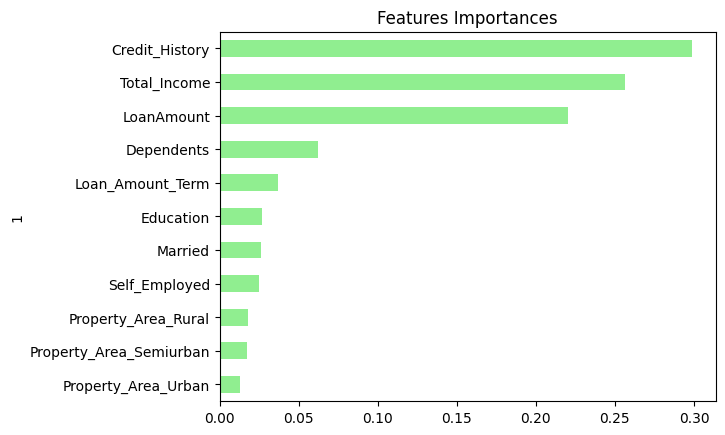

In [24]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)